In [1]:
import cv2

from matplotlib import pyplot as plt


In [32]:
img_file = cv2.imread('2A5R.png')

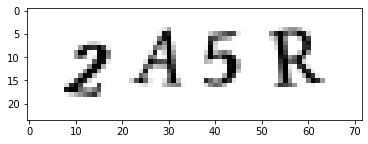

In [33]:

plt.imshow(img_file[:,:,::-1])
plt.show()
#img_file[1:10,1:10]

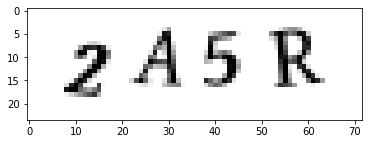

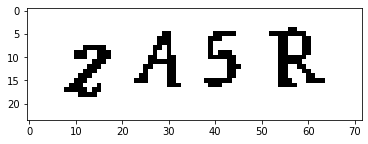

In [34]:
# for y in img_file.shape[0]:
#     for x in img_file.shape[1]:
#         if x[0]>0:
            
gray = cv2.cvtColor(img_file, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.show()

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
thresh = cv2.convertScaleAbs(thresh)
plt.imshow(thresh,cmap='gray')
plt.show()
thres = thresh.copy()

In [35]:
# im2, ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

In [8]:
#cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
thresh.shape

(24, 72)

In [9]:
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [90]:
# https://stackoverflow.com/questions/13887863/extract-bounding-box-and-save-it-as-an-image
ROI_number = 0
for i in range(0, len(contours)):
    #if (i % 2 == 0):
    cnt = contours[i]
    x,y,w,h = cv2.boundingRect(cnt)
    if h>8 and w>8:
        ROI = thres[y:y+h, x:x+w]
        cv2.rectangle(thresh,(x,y),(x+w,y+h),(255))
        cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
        ROI_number += 1
    else:
        #these will be unimportant, small noises
        pass


In [96]:
thresh=255-thres

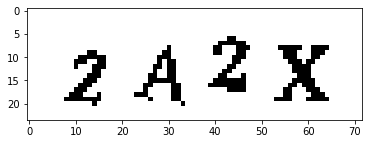

In [10]:
plt.imshow(thresh,cmap='gray')
plt.show()

In [13]:
k = 0
ROI_number = 0
for y in range(thresh.shape[1]):
    dummy = 0
    for x in range(thresh.shape[0]):
        #print(thresh[x][y],end=" ")
        if thresh[x][y] == 0:
            # if character is found
            dummy = 1
    if dummy ==1:
        if k ==1:
            sart_col = y
        k += 1
    if dummy == 0 and k >2:
        end_col = y
        # find contours within that region
        print("Start = ",sart_col," End = ",end_col)
        extract_im = thresh[:,sart_col-1:end_col+1].copy()
        contours, hierarchy = cv2.findContours(extract_im,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        for i in range(0, len(contours)):
            #if (i % 2 == 0):
            cnt = contours[i]
            x_,y_,w,h = cv2.boundingRect(cnt)
            if w> 5 and h > 5:
                ROI = extract_im[y_:y_+h, x_:x_+w]
                #cv2.rectangle(thresh,(x_,y_),(x_+w,y_+h),(255))
                cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
            k=0
        print("ROI_num = ",ROI_number)
        ROI_number += 1


Start =  9  End =  17
ROI_num =  0
Start =  24  End =  34
ROI_num =  1
Start =  40  End =  48
ROI_num =  2
Start =  54  End =  65
ROI_num =  3


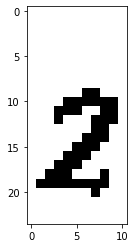

In [17]:
plt.imshow(thresh[:,7:18],cmap='gray')
plt.show()

In [57]:
contours, hierarchy = cv2.findContours(thresh[:,22:36],cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


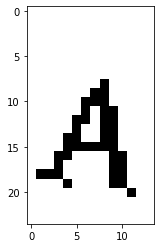

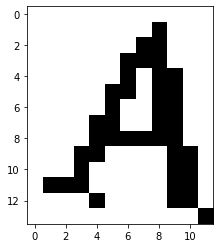

In [59]:
for i in range(0, len(contours)):
    #if (i % 2 == 0):
    cnt = contours[i]
    x_,y_,w,h = cv2.boundingRect(cnt)
    if w> 5 and h > 5:
        ROI = thresh[:,22:36][y_:y_+h, x_:x_+w]
        plt.imshow(ROI,cmap='gray')
        plt.show()
        #cv2.rectangle(thresh,(x_,y_),(x_+w,y_+h),(255))
        #cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)

Start =  9  End =  18
12 , 24
Start row =  9  End =  19


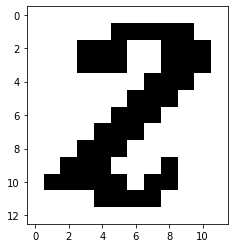

ROI_num =  0
Start =  24  End =  33
12 , 24
Start row =  6  End =  17


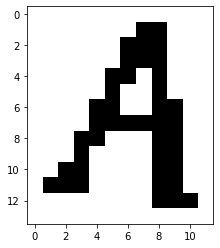

ROI_num =  1
Start =  39  End =  46
10 , 24
Start row =  6  End =  17


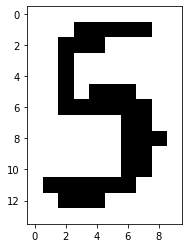

ROI_num =  2
Start =  53  End =  64
14 , 24
Start row =  5  End =  17


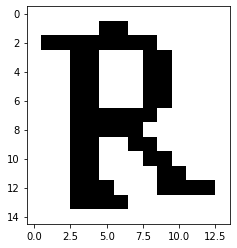

ROI_num =  3


In [44]:
k = 0
ROI_number = 0
for y in range(thresh.shape[1]):
    dummy = 0
    for x in range(thresh.shape[0]):
        #print(thresh[x][y],end=" ")
        if thresh[x][y] == 0:
            # if character is found
            dummy = 1
    if dummy ==1:
        if k ==1:
            sart_col = y
        k += 1
    if dummy == 0 and k >2:
        end_col = y
        k1 = 0
        # find contours within that region
        print("Start = ",sart_col," End = ",end_col)
        extract_im = thresh[:,sart_col-2:end_col+1].copy()
        print(extract_im.shape[1],",",extract_im.shape[0])
        for x1 in range(extract_im.shape[0]):
            dummy1 = 0
            for y1 in range(extract_im.shape[1]):
                if extract_im[x1][y1] == 0:
                    #if char is found
                    dummy1 = 1
            if dummy1 == 1:
                if k1 == 1:
                    start_row = x1
                k1 += 1
            if dummy1 == 0 and k1>2:
                end_row = x1
                print("Start row = ",start_row," End = ",end_row)
                cv2.imwrite('ROI_{}.png'.format(ROI_number), extract_im[start_row-2:end_row+1,:])
                plt.imshow(extract_im[start_row-2:end_row+1,:],cmap='gray')
                plt.show()
                break
        k=0
        print("ROI_num = ",ROI_number)
        ROI_number += 1

In [50]:
thresh.shape[0],thresh.shape[1]

(24, 72)

In [64]:
for y in range(thresh.shape[1]):
    for x in range(thresh.shape[0]):
        print(thresh[x][y],end=" ")
    print()

255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 0 255 255 255 255 255 
255 255 255 255 255 255 255 255 255 0 0 255 255 255 255 255 255 0 0 255 255 255 255 255 
255 255 255 255 255 255 255 255 0 0 255 255 255 255 255 255 0 0 0 255 255 255 255 255 
255 255 255 255 255 255 255 255 0 255 255 255 255 255 0 0 0 255 0 255 255 255 255 255 
255 255 255 255 255 255 255 0 0 255 255 255 255 0 0 255 255 255 0 0 255 255 255 255 
255 255 255 255 255 255 255 0 0 255 255 255 0 0 255 255 255 255 0 0 255 